# #Task 2
#Prediction using Unsupervised  Learning
⨘ project by TSF
---
##⨊ Auther: Anshul Pratap

## Importing Necessary Liberaries

In [1]:
import pandas as pd  #pandas liberay for loading dataset
import numpy as np # numpy for mathematical calculations
import matplotlib.pyplot as plt #matplotlib for plotting graphs

#after importing all the liberaries let's load the data 

In [2]:
# Loading the dataset 
Data = pd.read_csv("C://Users/Anshul Pratap/Desktop/Iris (1).csv")
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


####Data preprocessing 

In [3]:
# checking the data shape and size
print(f'Shape : {Data.shape[0]}')
print(f'Size : {Data.shape[1]}')
print(Data['Species'].value_counts())

Shape : 150
Size : 6
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64


In [4]:
#Dropping the Id column and Species columns form the data set
data = Data.drop(columns=['Id','Species'],axis= 1)

In [5]:
data.head(2) #checking the dataset again after removing the id and species columns

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


### Normalisation of values

In [6]:
# minmax_scale to scale down the value in same range 
from sklearn.preprocessing import minmax_scale
data_scale  = minmax_scale(data)  #scale downed the values of dataframe
X = pd.DataFrame(data_scale,columns= data.columns) #created a dataframe with new scaled values

# changing the categorical values to numerical values
Y = Data.replace(to_replace=['Iris-setosa','Iris-virginica','Iris-versicolor'] , value= [0,1,2])

#target 
y = Y['Species']  #assigning to y variable

##    Plotting the graph 
##Sepal Length VS Sepal Width

Text(0, 0.5, 'petal Width')

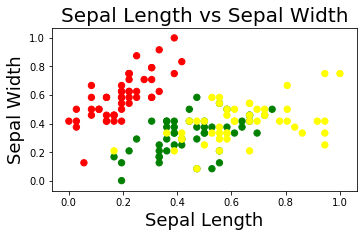

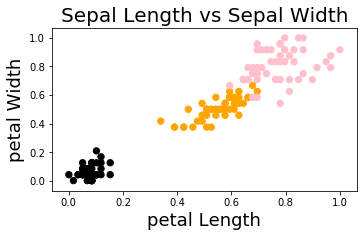

In [7]:
#plotting scatter plot with length and width of sepal

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.scatter(X['SepalLengthCm'], X['SepalWidthCm'], c=np.array(['red','yellow','green'])[y],s= 40)
plt.title('Sepal Length vs Sepal Width',fontsize=20)
plt.xlabel('Sepal Length',fontsize=18)
plt.ylabel('Sepal Width',fontsize=18)

#petal length vs Petal width graph 
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.scatter(X['PetalLengthCm'], X['PetalWidthCm'], c=np.array(['black','pink','orange'])[y],s= 40)
plt.title('Sepal Length vs Sepal Width',fontsize=20)
plt.xlabel('petal Length',fontsize=18)
plt.ylabel('petal Width',fontsize=18)

###KMeans algorithm to see if it can create the clusters automatically.

In [8]:
from sklearn.cluster import KMeans #importing KMeans algorithm

error = [ ]   #defining list to store inertias 

for K in range(1,20): #running for loop from 1 - 9 
    #assigning KMeans algo to kmeans variable
    kmeans = KMeans(n_clusters=K ,
                    init= "k-means++",
                    max_iter = 300,
                    n_init = 10,
                    random_state= 0
                    ).fit(X)
    error.append(kmeans.inertia_) #appending inertia_ values to error list
#showing error 
print(len(error)) 

19


# # # Plotting Elbow graph to check clusters

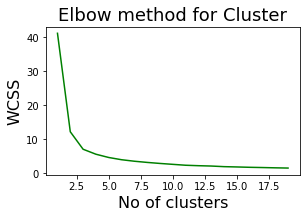

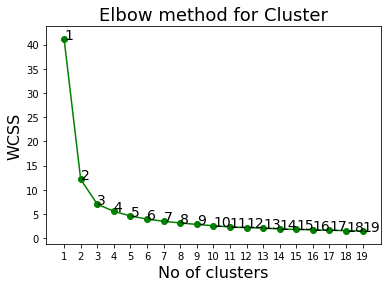

In [9]:
# ploting graph of K no. of cluster vs Error or inertia 
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
#plotting line graph using plot() func of matplotlib liberary
plt.subplot(2,2,1)
K = []
for i in range(1,20):
    K.append(i)
plt.plot(K,error, color='green')
# plt.scatter(K,error, color='green')
plt.title("Elbow method for Cluster",fontsize=18)
plt.xlabel("No of clusters",fontsize=16)
plt.ylabel("WCSS",fontsize=16)
plt.show()



#designing grap for clear visualisation
    
plt.plot(K,error, color='green')
plt.scatter(K,error, color='green')

for i in range(1,20):
    plt.text(i,error[i-1],i,fontsize=14)
    
plt.xticks([i for i in range(1,20)])
plt.title("Elbow method for Cluster",fontsize=18)
plt.xlabel("No of clusters",fontsize=16)
plt.ylabel("WCSS",fontsize=16)
plt.show()



In [10]:
Kmodel = KMeans(n_clusters=3,init="k-means++",
                n_init=10, 
                max_iter = 300,
                random_state=0)
y_kmeans = Kmodel.fit_predict(X)

# visualising the clusters 

In [11]:
x = X.iloc[:,[0,1,2,3]].values

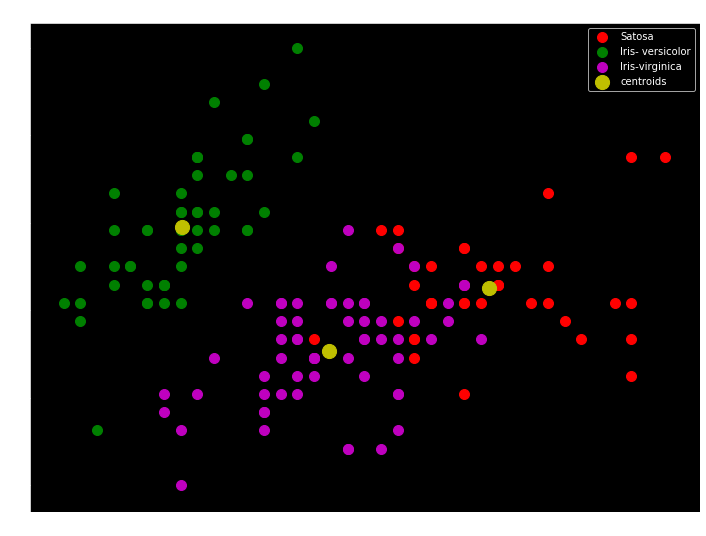

In [12]:
# plotting graphs for two attributes

plt.figure(figsize=(12,9))

plt.style.use('dark_background') # for dark background in graph
# plt.grid(color="grey") you can use grids using this command
# plotting scatter graph for 2d visualisation
plt.scatter(x[y_kmeans == 0 , 0], x[y_kmeans == 0, 1],color='red', label= "Satosa",s = 100)
plt.scatter(x[y_kmeans == 1 , 0], x[y_kmeans == 1, 1],color='Green', label= "Iris- versicolor",s = 100)
plt
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
           c = 'm', label = 'Iris-virginica',s = 100)
# now lets plot the centroids
plt.scatter(Kmodel.cluster_centers_[:,0],Kmodel.cluster_centers_[:,1], color="y",s=200,label = "centroids")
plt.title("Clusters")
plt.legend()
plt.show()

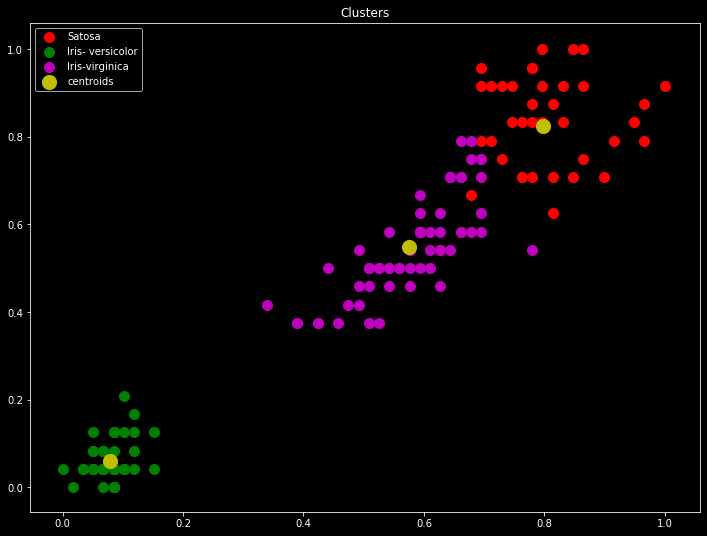

In [13]:
# visualisation for ------ next 2 columns

plt.figure(figsize=(12,9))

# plt.style.use('') # for dark background in graph
# plt.grid(color="grey") you can use grids using this command
# plotting scatter graph for 2d visualisation
plt.scatter(x[y_kmeans == 0 , 2], x[y_kmeans == 0, 3],color='red', label= "Satosa",s = 100)
plt.scatter(x[y_kmeans == 1 , 2], x[y_kmeans == 1, 3],color='Green', label= "Iris- versicolor",s = 100)
plt
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
           c = 'm', label = 'Iris-virginica',s = 100)
# now lets plot the centroids
plt.scatter(Kmodel.cluster_centers_[:,2],Kmodel.cluster_centers_[:,3], color="y",s=200,label = "centroids")
plt.title("Clusters")
plt.legend()
plt.show()